# AirBNB Boston & Seattle Data Analysis

## The analysis will try to answer the following questions
 - What are the most expensive neighbourhoods?
 - Can I use historical data to predict the price?
 - What are the most important factors in determing the price?

Setting up the necessary library and importing the files

In [770]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

dfB = pd.read_csv('C:/Users/MarchettiE/Documents/Training/Data Science Nanodegree/listings_Boston.csv')
dfS = pd.read_csv('C:/Users/MarchettiE/Documents/Training/Data Science Nanodegree/listings_Seattle.csv')
dfS.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Looking at the description of Boston dataset

In [654]:
dfB.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Since I have the column "city", I wish to work with a single dataset, so I append the two datasets togheter.
Seattle dataset has 3 more columns than Boston. As they are free text we can lose them for this analysis.
I am also going to remove all the remaining free text column, the redundat ones (same info in another column) and the ones not interesting for my analysis

In [655]:
dfAll = pd.concat([dfB.drop(['id','listing_url','scrape_id','last_scraped','summary','space','description','neighborhood_overview','notes','transit','thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url', 'host_name', 'host_since', 'host_location', 'host_about','host_thumbnail_url', 'host_picture_url','host_neighbourhood', 'host_verifications','street', 'neighbourhood','amenities','first_review','last_review','name', 'smart_location', 'market', 'calendar_updated', 'calendar_last_scraped','zipcode'], axis = 1), dfS.drop(['id','listing_url','scrape_id','last_scraped','summary','space','description','neighborhood_overview','notes','transit','thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url', 'host_name', 'host_since', 'host_location', 'host_about','host_thumbnail_url', 'host_picture_url','host_neighbourhood', 'host_verifications','street', 'neighbourhood','amenities','access','interaction','house_rules','first_review','last_review','name', 'smart_location', 'market', 'calendar_updated', 'calendar_last_scraped','zipcode'],axis=1)],sort=False)
dfAll.shape[1]

57

In [656]:
pd.set_option("display.max_rows", 100)
dfAllNull = dfAll.isnull().sum()
(dfAllNull / len(dfAll))*100

experiences_offered                   0.000000
host_response_time                   13.426989
host_response_rate                   13.426989
host_acceptance_rate                 16.803998
host_is_superhost                     0.027016
host_listings_count                   0.027016
host_total_listings_count             0.027016
host_has_profile_pic                  0.027016
host_identity_verified                0.027016
neighbourhood_cleansed                0.000000
neighbourhood_group_cleansed         48.426314
city                                  0.027016
state                                 0.000000
country_code                          0.000000
country                               0.000000
latitude                              0.000000
longitude                             0.000000
is_location_exact                     0.000000
property_type                         0.054032
room_type                             0.000000
accommodates                          0.000000
bathrooms    

If almost half of the rows are missing for a single column, I am not going to accept those columns. Replace the missing values with average will not give a good representation of the reality. So I will lose: neighbourhood_group_cleansed, square_feet, weekly_price, monthly_price, has_availability, license, jurisdiction_names.
Secutiry_deposit may be treaten has an exception, since missing value may be interpreted as "security Deposit not Required"

In [657]:
dfAll = dfAll.drop(['neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'has_availability', 'license', 'jurisdiction_names'], axis = 1)
dfAll.shape[1]

50

for the remaining columns, I want to check the cardinality. If a column will only show one value, it will not help the analysis

In [658]:
dfAll.nunique()

experiences_offered                    1
host_response_time                     4
host_response_rate                    58
host_acceptance_rate                  72
host_is_superhost                      2
host_listings_count                   44
host_total_listings_count             44
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood_cleansed               111
city                                  45
state                                  3
country_code                           1
country                                1
latitude                            7403
longitude                           7403
is_location_exact                      2
property_type                         19
room_type                              3
accommodates                          15
bathrooms                             13
bedrooms                               8
beds                                  13
bed_type                               5
price           

Data with cardinality = 1 is not really useful for the analysis.

In [659]:
dfAll = dfAll.drop(['experiences_offered', 'country_code', 'country', 'requires_license'], axis = 1)
dfAll.shape[1]

46

I am going to lose the rows with a very small percentage of null rows (<0.9%) since the number is quite small. For the remaining ones I need to investigate if they are object or numbers

In [660]:
dfAll = dfAll[dfAll['host_is_superhost'].notna()]
dfAll = dfAll[dfAll['host_listings_count'].notna()]
dfAll = dfAll[dfAll['host_total_listings_count'].notna()]
dfAll = dfAll[dfAll['host_has_profile_pic'].notna()]
dfAll = dfAll[dfAll['host_identity_verified'].notna()]
dfAll = dfAll[dfAll['city'].notna()]
dfAll = dfAll[dfAll['property_type'].notna()]
dfAll = dfAll[dfAll['bathrooms'].notna()]
dfAll = dfAll[dfAll['bedrooms'].notna()]
dfAll = dfAll[dfAll['beds'].notna()]
dfAll.shape[0]

7345

In [661]:
dfAll[['host_response_time',
'host_response_rate',
'host_acceptance_rate',
'cleaning_fee',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin' ,
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'reviews_per_month']].dtypes

host_response_time              object
host_response_rate              object
host_acceptance_rate            object
cleaning_fee                    object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

For the "scores" I can use the average for the missing values. For the object, I need to check one column at the time.

Host_response_time

In [662]:
dfAll.host_response_time.unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

If I want to take the "mean" approach I can classify null values as "Between few hours and a day"

In [663]:
dfAll[['host_response_time']] = dfAll[['host_response_time']].fillna('Between few hours and a day')

host_response_rate

In [664]:
dfAll.host_response_rate.unique()

array(['96%', '98%', '67%', nan, '100%', '71%', '97%', '60%', '50%',
       '31%', '90%', '70%', '88%', '80%', '63%', '33%', '99%', '75%',
       '83%', '94%', '58%', '43%', '93%', '92%', '40%', '57%', '89%',
       '95%', '78%', '81%', '91%', '38%', '86%', '30%', '56%', '76%',
       '64%', '82%', '17%', '87%', '25%', '69%', '53%', '65%', '68%',
       '55%', '77%', '36%', '73%', '0%', '85%', '14%', '19%', '79%',
       '61%', '84%', '20%', '6%', '10%'], dtype=object)

This is actually a numeric value. I need to convert into numeric and use the average for the missing value

In [665]:
dfAll[['host_response_rate']] = dfAll['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [666]:
dfAll[['host_response_rate']] = dfAll[['host_response_rate']].fillna(dfAll[['host_response_rate']].mean())

host_acceptance_rate

In [667]:
dfAll.host_acceptance_rate.unique()

array(['100%', nan, '0%', '88%', '50%', '95%', '96%', '89%', '97%', '79%',
       '94%', '63%', '92%', '71%', '83%', '91%', '67%', '73%', '85%',
       '93%', '60%', '25%', '75%', '56%', '76%', '57%', '74%', '82%',
       '62%', '90%', '77%', '33%', '58%', '78%', '81%', '17%', '86%',
       '20%', '70%', '80%', '72%', '98%', '69%', '45%', '55%', '68%',
       '42%', '30%', '99%', '36%', '84%', '19%', '61%', '29%', '87%',
       '66%', '54%', '65%', '64%', '51%', '43%', '23%', '40%', '48%',
       '47%', '52%', '28%', '18%', '46%', '59%', '44%', '38%', '53%'],
      dtype=object)

In [668]:
dfAll[['host_acceptance_rate']] = dfAll['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

In [669]:
dfAll[['host_acceptance_rate']] = dfAll[['host_acceptance_rate']].fillna(dfAll[['host_acceptance_rate']].mean())

cleaning_fee

In [670]:
dfAll.cleaning_fee.unique()

array([nan, '$40.00', '$300.00', '$125.00', '$25.00', '$15.00', '$150.00',
       '$95.00', '$85.00', '$89.00', '$35.00', '$250.00', '$200.00',
       '$65.00', '$100.00', '$80.00', '$99.00', '$50.00', '$20.00',
       '$55.00', '$75.00', '$30.00', '$60.00', '$120.00', '$78.00',
       '$12.00', '$45.00', '$10.00', '$264.00', '$180.00', '$90.00',
       '$7.00', '$131.00', '$8.00', '$5.00', '$185.00', '$199.00',
       '$175.00', '$110.00', '$155.00', '$111.00', '$72.00', '$105.00',
       '$160.00', '$13.00', '$275.00', '$28.00', '$70.00', '$209.00',
       '$82.00', '$195.00', '$145.00', '$22.00', '$225.00', '$169.00',
       '$119.00', '$29.00', '$140.00', '$61.00', '$49.00', '$108.00',
       '$6.00', '$26.00', '$83.00', '$18.00', '$19.00', '$117.00',
       '$112.00', '$58.00', '$16.00', '$170.00', '$64.00', '$113.00',
       '$79.00', '$130.00', '$96.00', '$149.00', '$164.00', '$159.00',
       '$32.00', '$184.00', '$109.00', '$107.00', '$274.00', '$143.00',
       '$88.00', '$22

In [671]:
dfAll['cleaning_fee'] = dfAll['cleaning_fee'].str.replace('$','').astype('float')

In [672]:
dfAll[['cleaning_fee']] = dfAll[['cleaning_fee']].fillna(dfAll[['cleaning_fee']].mean())

Adding the average in the missing value for the "scores"

In [673]:
dfAll[['review_scores_rating']] = dfAll[['review_scores_rating']].fillna(dfAll[['review_scores_rating']].mean())
dfAll[['review_scores_accuracy']] = dfAll[['review_scores_accuracy']].fillna(dfAll[['review_scores_accuracy']].mean())
dfAll[['review_scores_cleanliness']] = dfAll[['review_scores_cleanliness']].fillna(dfAll[['review_scores_cleanliness']].mean())
dfAll[['review_scores_checkin']] = dfAll[['review_scores_checkin']].fillna(dfAll[['review_scores_checkin']].mean())
dfAll[['review_scores_communication']] = dfAll[['review_scores_communication']].fillna(dfAll[['review_scores_communication']].mean())
dfAll[['review_scores_location']] = dfAll[['review_scores_location']].fillna(dfAll[['review_scores_location']].mean())
dfAll[['review_scores_value']] = dfAll[['review_scores_value']].fillna(dfAll[['review_scores_value']].mean())
dfAll[['reviews_per_month']] = dfAll[['reviews_per_month']].fillna(dfAll[['reviews_per_month']].mean())


security_deposit is the only column that still contains missing values. I will use the assumption that, if a deposit is missing, that means that it does not require deposit

In [674]:
dfAll[['host_acceptance_rate']] = dfAll[['host_acceptance_rate']].fillna(dfAll[['host_acceptance_rate']].mean())

In [675]:
dfAll['security_deposit'] = dfAll['security_deposit'].str.replace('$','').str.replace(',','').astype('float')
dfAll['security_deposit'] = dfAll[['security_deposit']].fillna(0)

check if I have "fixed" all the missing value

In [676]:
dfAllNull = dfAll.isnull().sum()
(dfAllNull / len(dfAll))*100

host_response_time                  0.0
host_response_rate                  0.0
host_acceptance_rate                0.0
host_is_superhost                   0.0
host_listings_count                 0.0
host_total_listings_count           0.0
host_has_profile_pic                0.0
host_identity_verified              0.0
neighbourhood_cleansed              0.0
city                                0.0
state                               0.0
latitude                            0.0
longitude                           0.0
is_location_exact                   0.0
property_type                       0.0
room_type                           0.0
accommodates                        0.0
bathrooms                           0.0
bedrooms                            0.0
beds                                0.0
bed_type                            0.0
price                               0.0
security_deposit                    0.0
cleaning_fee                        0.0
guests_included                     0.0


#### Question no. 1 - What are the most expensive areas?

In order to answer this question I need to trnsform my price column into float

In [677]:
dfAll['price'] = dfAll['price'].str.replace('$','').str.replace(',','').astype('float')

I will answer the question for Seattle first

In [678]:
SeattleAverage = dfAll[dfAll['state'] == 'MA'].groupby('neighbourhood_cleansed')['price'].mean().reset_index()

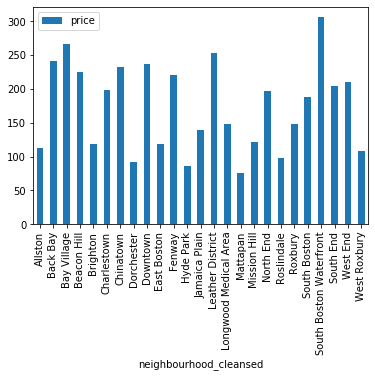

In [679]:
ax = SeattleAverage.plot.bar(x='neighbourhood_cleansed', y='price', rot=90)

South Boston Waterfront seems the more expensive. I want to have a look at the top 10

In [680]:
SeattleAverage.sort_values(['price'], axis=0, ascending=[False]).head(10)

,neighbourhood_cleansed,price
21,South Boston Waterfront,306.060241
2,Bay Village,266.833333
13,Leather District,253.600000
1,Back Bay,241.412752
8,Downtown,236.730994
6,Chinatown,232.352113
3,Beacon Hill,224.699482
10,Fenway,220.334495
23,West End,209.591837
22,South End,204.481132


The above are the ten more expensive neighbourhoods in Seattle. I want to compare this result with boston

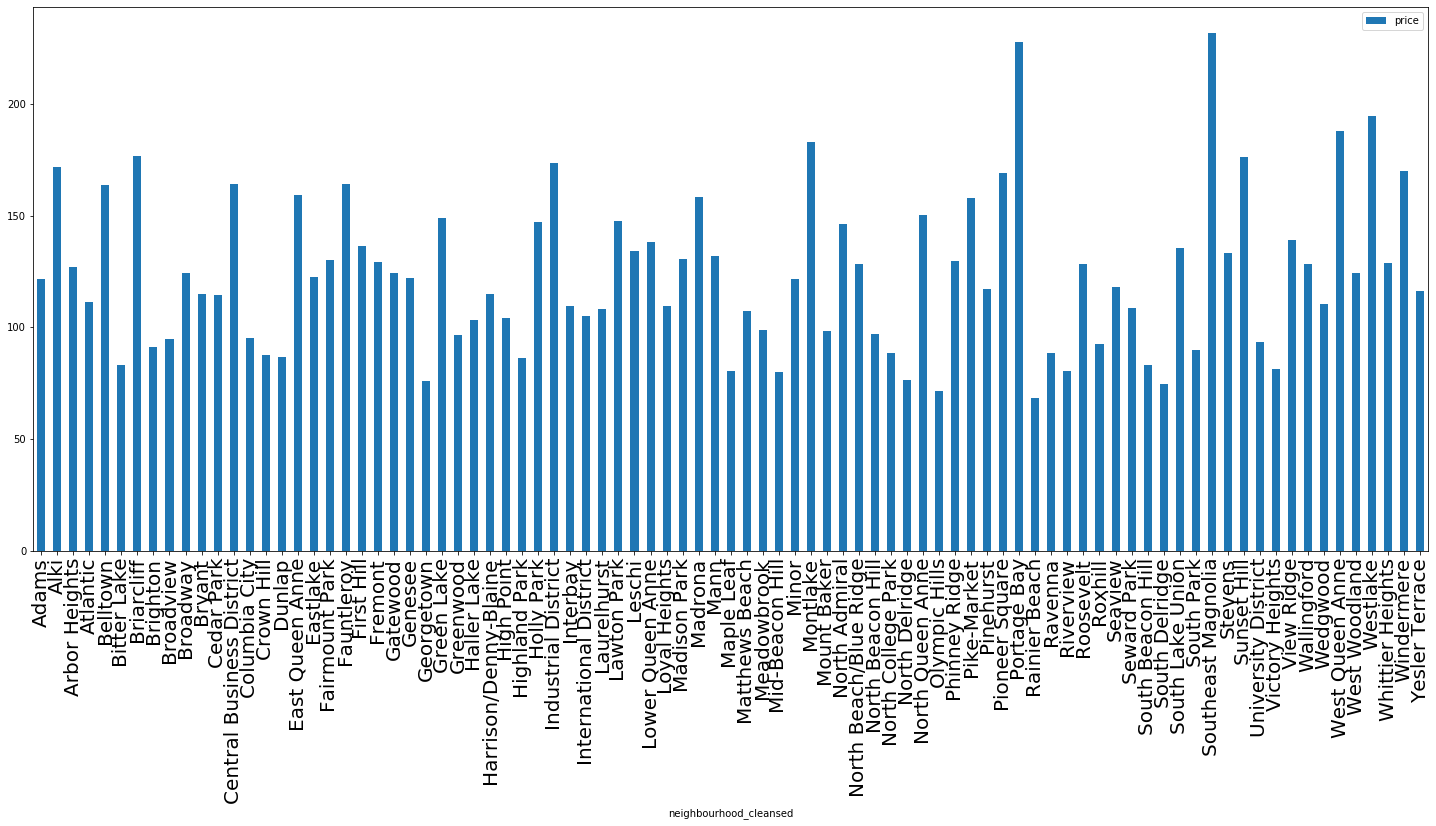

In [681]:
BostonAverage = dfAll[dfAll['state'].str.upper() == 'WA'].groupby('neighbourhood_cleansed')['price'].mean().reset_index() 
ax = BostonAverage.plot.bar(x='neighbourhood_cleansed', y='price', rot=90, figsize=(25,10))
ax.xaxis.set_tick_params(labelsize=20)

Southest Magnolia seems the more expensive. I want to have a look at the top 10

In [682]:
BostonAverage.sort_values(['price'], axis=0, ascending=[False]).head(10)

,neighbourhood_cleansed,price
73,Southeast Magnolia,231.705882
61,Portage Bay,227.857143
83,Westlake,194.470588
81,West Queen Anne,187.769231
48,Montlake,182.789474
6,Briarcliff,176.571429
75,Sunset Hill,176.055556
32,Industrial District,173.333333
1,Alki,171.619048
85,Windermere,169.900000


It is interisting to see that, on average, Seattle seems more expensive than Boston. Boston more expensive neighbourhood, Southest Magnolia, is comparable to number 6 in Seattle top 10: Chinatown. this means that there are five neighbourhoods in Seattle that are, on average, more expensive than the most expensive neighbourhood in Boston.

### Quetion no. 2 - Can I use historical data to predict the price?

I would like to use linear regression to predict the house price. In order to do that, I need to check what of my variables are still objects

In [683]:
dfAll.dtypes

host_response_time                   object
host_response_rate                  float64
host_acceptance_rate                float64
host_is_superhost                    object
host_listings_count                 float64
host_total_listings_count           float64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
city                                 object
state                                object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
price                               float64
security_deposit                

If I want to use this information in a linear regression, I need to transform those variables into numeric. I can classify them into 4 groups:
1. The tranformation into numeric can be "meaningful":
> host_response time can be translated into "hours": "within a few hours" = 3, "within an hour" = 1, "within a day" = 24, "a few days or more" = 72, "Between few hours and a day" = 10  
> cancellation_policy: flexible = 1, moderate = 2, strict = 3
2. The value is already a number, just need to be converted into a float:
> extra_people
3. The varaibles are just categorical data. Each unique value all the variable needs to be coverted into a column with 1 if the rows has that value and 0 otherwise:
> neighbourhood_cleansed, city, state, property_type, room_type, bed_type
4. Boolean variable: 1 for true, 0 for false:
> require_guest_profile_picture,require_guest_phone_verification, host_is_superhost, 
host_has_profile_pic, 
host_identity_verified, 
is_location_exact, 
instant_bookable

Group 1:

In [748]:
dfAllLR = dfAll
dfAllLR.loc[dfAllLR.host_response_time == "within a few hours", 'host_response_time_n'] = 3
dfAllLR.loc[dfAllLR.host_response_time == "within an hour", 'host_response_time_n'] = 1
dfAllLR.loc[dfAllLR.host_response_time == "within a day", 'host_response_time_n'] = 24
dfAllLR.loc[dfAllLR.host_response_time == "a few days or more", 'host_response_time_n'] = 72
dfAllLR.loc[dfAllLR.host_response_time == "Between few hours and a day", 'host_response_time_n'] = 10
dfAllLR.loc[dfAllLR.cancellation_policy == "flexible", 'cancellation_policy_n'] = 1
dfAllLR.loc[dfAllLR.cancellation_policy == "moderate", 'cancellation_policy_n'] = 2
dfAllLR.loc[dfAllLR.cancellation_policy == "strict", 'cancellation_policy_n'] = 3
dfAllLR.loc[dfAllLR.cancellation_policy == "super_strict_30", 'cancellation_policy_n'] = 4

In [749]:
dfAllLR[['host_response_time', 'host_response_time_n','cancellation_policy','cancellation_policy_n']].head()

,host_response_time,host_response_time_n,cancellation_policy,cancellation_policy_n
0,within a few hours,3.0,moderate,2.0
1,within an hour,1.0,strict,3.0
2,within a few hours,3.0,strict,3.0
3,Between few hours and a day,10.0,flexible,1.0
4,within an hour,1.0,strict,3.0


In [750]:
dfAllLR = dfAllLR.drop(['host_response_time','cancellation_policy'],axis=1)

Group 2:

In [751]:
dfAllLR['extra_people'] = dfAllLR['extra_people'].str.replace('$','').str.replace(',','').astype('float')

Group 3:

In [752]:
neighbourhood_cleansed_d = pd.get_dummies(dfAllLR.neighbourhood_cleansed, prefix='neighbourhood')
dfAllLR = pd.concat([dfAllLR, neighbourhood_cleansed_d], axis=1)
room_type_d = pd.get_dummies(dfAllLR.room_type, prefix='room_type')
dfAllLR = pd.concat([dfAllLR, room_type_d], axis=1)
dfAllLR.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,...,neighbourhood_West Queen Anne,neighbourhood_West Roxbury,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.96000,1.000000,f,3.0,3.0,t,t,West Queen Anne,Seattle,WA,...,1,0,0,0,0,0,0,1,0,0
1,0.98000,1.000000,t,6.0,6.0,t,t,West Queen Anne,Seattle,WA,...,1,0,0,0,0,0,0,1,0,0
2,0.67000,1.000000,f,2.0,2.0,t,t,West Queen Anne,Seattle,WA,...,1,0,0,0,0,0,0,1,0,0
3,0.94949,0.920584,f,1.0,1.0,t,t,West Queen Anne,Seattle,WA,...,1,0,0,0,0,0,0,1,0,0
4,1.00000,0.920584,f,2.0,2.0,t,t,West Queen Anne,Seattle,WA,...,1,0,0,0,0,0,0,1,0,0


In [753]:
dfAllLR = dfAllLR.drop(['neighbourhood_cleansed','city','state','property_type','room_type','bed_type'],axis=1)

Group 4:

In [754]:
dfAllLR.loc[dfAllLR.require_guest_profile_picture == "t", 'require_guest_profile_picture_n'] = 1
dfAllLR.loc[dfAllLR.require_guest_profile_picture == "f", 'require_guest_profile_picture_n'] = 0
dfAllLR.loc[dfAllLR.require_guest_phone_verification == "t", 'require_guest_phone_verification_n'] = 1
dfAllLR.loc[dfAllLR.require_guest_phone_verification == "f", 'require_guest_phone_verification_n'] = 0
dfAllLR.loc[dfAllLR.host_is_superhost == "t", 'host_is_superhost_n'] = 1
dfAllLR.loc[dfAllLR.host_is_superhost == "f", 'host_is_superhost_n'] = 0
dfAllLR.loc[dfAllLR.host_has_profile_pic == "t", 'host_has_profile_pic_n'] = 1
dfAllLR.loc[dfAllLR.host_has_profile_pic == "f", 'host_has_profile_pic_n'] = 0
dfAllLR.loc[dfAllLR.host_identity_verified == "t", 'host_identity_verified_n'] = 1
dfAllLR.loc[dfAllLR.host_identity_verified == "f", 'host_identity_verified_n'] = 0
dfAllLR.loc[dfAllLR.is_location_exact == "t", 'is_location_exact_n'] = 1
dfAllLR.loc[dfAllLR.is_location_exact == "f", 'is_location_exact_n'] = 0
dfAllLR.loc[dfAllLR.instant_bookable == "t", 'instant_bookable_n'] = 1
dfAllLR.loc[dfAllLR.instant_bookable == "f", 'instant_bookable_n'] = 0

In [755]:
dfAllLR[['require_guest_profile_picture', 'require_guest_profile_picture_n','require_guest_phone_verification','require_guest_phone_verification_n']].head()

,require_guest_profile_picture,require_guest_profile_picture_n,require_guest_phone_verification,require_guest_phone_verification_n
0,f,0.0,f,0.0
1,t,1.0,t,1.0
2,f,0.0,f,0.0
3,f,0.0,f,0.0
4,f,0.0,f,0.0


In [756]:
dfAllLR = dfAllLR.drop(['require_guest_profile_picture','require_guest_phone_verification','host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable'],axis=1)

My data should be ready to use now for linear regression. I just do a final check that all my columns are float and not missing

In [768]:
dfAllNullLR = dfAllLR.isnull().sum()
dfNullLR = (dfAllNullLR / len(dfAllLR))*100
dfNullLR = pd.DataFrame(dfNullLR,columns = ['Per'])
dfNullLR.sort_values(['Per'], axis=0, ascending=[False]).head(10)

,Per
host_response_rate,0.0
neighbourhood_North Queen Anne,0.0
neighbourhood_Mount Baker,0.0
neighbourhood_North Admiral,0.0
neighbourhood_North Beach/Blue Ridge,0.0
neighbourhood_North Beacon Hill,0.0
neighbourhood_North College Park,0.0
neighbourhood_North Delridge,0.0
neighbourhood_North End,0.0
neighbourhood_Olympic Hills,0.0


In [758]:
DT = pd.DataFrame(dfAllLR.dtypes, columns = ['Type'])
DT.groupby('Type')['Type'].count() 

Type
uint8      114
int64       10
float64     30
Name: Type, dtype: int64

The data set is now ready! I can start the linear regression  
For obvious reason I will not use latitude and longitude as a measure  
Split data into training and test data, and fit a linear model

In [759]:
X = dfAllLR.drop(['price','latitude','longitude'], axis = 1)
Y = dfAllLR['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.30, random_state=23)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

The model has now been trained. Let's check how good or bad it works with the testing dataset

In [760]:
y_test_preds = lm_model.predict(X_test)
r2_test = r2_score(y_test, y_test_preds)

r2_test

0.5464226052199179

The result is not too bad but I would like to have R2 has close to 1 as possible. I check the coefficients and remove the less significant ones that may just bring noise

In [761]:
X2 = dfAllLR.drop(['price','latitude','longitude','review_scores_accuracy', 'calculated_host_listings_count','host_total_listings_count',
'host_identity_verified_n', 'host_listings_count','review_scores_communication','host_response_rate',
'accommodates','review_scores_cleanliness','is_location_exact_n','minimum_nights','review_scores_checkin','availability_60',
                   'availability_30','availability_365','minimum_nights'], axis = 1)
Y2 = dfAllLR['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2 , test_size=0.30, random_state=23)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [762]:
y_test_preds = lm_model.predict(X2_test)
r2_test = r2_score(y2_test, y_test_preds) 

r2_test

0.5558376287938311

I can see an increase in R2 and this can give me a clue that the second model is better.  
There is still room for improvement (especially if we want to explore a different type of Machine learning model) but the results suggests that is possible to predict the price based on the provided data

### Question no. 3 - What are the most important factors in determing the price?

Let's analyse the coefficient of the model I have just create:

In [763]:
pd.set_option("display.max_rows", 300)
coefficients = pd.concat([pd.DataFrame(X2.columns, columns = ['col']),pd.DataFrame(np.transpose(lm_model.coef_), columns = ['coeff'])], axis = 1)
coefficients.sort_values(['coeff'], axis=0, ascending=[False]).head(150)

,col,coeff
128,room_type_Entire home/apt,6.491536e+13
129,room_type_Private room,6.491536e+13
130,room_type_Shared room,6.491536e+13
107,neighbourhood_South Boston Waterfront,1.728310e+13
22,neighbourhood_Back Bay,1.728310e+13
46,neighbourhood_Fenway,1.728310e+13
24,neighbourhood_Beacon Hill,1.728310e+13
39,neighbourhood_Downtown,1.728310e+13
23,neighbourhood_Bay Village,1.728310e+13
66,neighbourhood_Leather District,1.728310e+13


As expected Room type and Neighbourhood hugely affect the prices. However, it is interesting to see than the number of bathrooms has a similar importance than the host acceptance rate and the request of guest phone verification. While the number of bedrooms is of, course, quite significant, the actual number of beds isn't. The fact that the host is a super host is also relevant.

In [769]:
pd.set_option("display.max_rows", 300)
coefficients = pd.concat([pd.DataFrame(X2.columns, columns = ['col']),pd.DataFrame(np.transpose(lm_model.coef_), columns = ['coeff'])], axis = 1)
coefficients.sort_values(['coeff'], axis=0, ascending=[True]).head(10)

,col,coeff
134,host_has_profile_pic_n,-2.758847e+01
131,require_guest_profile_picture_n,-1.525179e+01
13,review_scores_value,-6.410838e+00
16,cancellation_policy_n,-5.665912e+00
135,instant_bookable_n,-3.262363e+00
14,reviews_per_month,-2.920532e+00
12,review_scores_location,-5.603283e-01
10,number_of_reviews,-1.068812e-01
8,maximum_nights,-1.725769e-07
15,host_response_time_n,6.024165e-03


It is also interesting to notice that the fact the host provides a profile picture seems to negatively influencing the price. Even the request for the guest to have a profile picture seems to give the same effect.  
Feature that may seems importance such as instant booking, reviews, host response time, etc. do not seesm to have a great impact on the price